**AI Powered Employee Burnout Analysis**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:

# read the excel file
df  = pd.read_excel("employee_burnout_analysis-AI.xlsx")

# convert the excel file to csv
Df = df.to_csv("Employee_BurnOut_Analysis.csv",index=False)


In [3]:
Data = pd.read_csv("Employee_BurnOut_Analysis.csv")
Data.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3,6.0,NaN,0.67


In [4]:
# Drop the Unwanted Features from the Dataset
Data.drop(['Employee ID','Date of Joining'],axis=1,inplace=True)

In [5]:
Data.head(5)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
2,Female,Product,Yes,2,NaN,5.8,0.49
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52


In [6]:
Data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                22750 non-null  object 
 1   Company Type          22750 non-null  object 
 2   WFH Setup Available   22750 non-null  object 
 3   Designation           22750 non-null  int64  
 4   Resource Allocation   21369 non-null  float64
 5   Mental Fatigue Score  20633 non-null  float64
 6   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.2+ MB


In [8]:
Data.count()

,0
Gender,22750
Company Type,22750
WFH Setup Available,22750
Designation,22750
Resource Allocation,21369
Mental Fatigue Score,20633
Burn Rate,21626


In [9]:
# Handling the Missing values

print(Data.isnull().sum())

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


In [10]:
# Fill the Mean Missing Values with the mean
Data['Resource Allocation'].fillna(Data['Resource Allocation'].mean(),inplace=True)
Data['Mental Fatigue Score'].fillna(Data['Mental Fatigue Score'].mean(),inplace=True)
Data['Burn Rate'].fillna(Data['Burn Rate'].mean(),inplace=True)

In [11]:
print( "Is Any Null Values Are Present or not?\n",print(),Data.isnull().count())


Is Any Null Values Are Present or not?
 None Gender                  22750
Company Type            22750
WFH Setup Available     22750
Designation             22750
Resource Allocation     22750
Mental Fatigue Score    22750
Burn Rate               22750
dtype: int64


In [12]:
Data.head(5)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.000000,3.8,0.16
1,Male,Service,Yes,1,2.000000,5.0,0.36
2,Female,Product,Yes,2,4.481398,5.8,0.49
3,Male,Service,Yes,1,1.000000,2.6,0.20
4,Female,Service,No,3,7.000000,6.9,0.52


In [13]:
Data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,1.984099,1.829281,0.193267
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.700000,0.320000
50%,2.000000,4.481398,5.728188,0.452005
75%,3.000000,6.000000,6.900000,0.580000
max,5.000000,10.000000,10.000000,1.000000


In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                22750 non-null  object 
 1   Company Type          22750 non-null  object 
 2   WFH Setup Available   22750 non-null  object 
 3   Designation           22750 non-null  int64  
 4   Resource Allocation   22750 non-null  float64
 5   Mental Fatigue Score  22750 non-null  float64
 6   Burn Rate             22750 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.2+ MB


In [15]:
# Tradition way to Encoding
Data['Gender'] = Data.Gender.map({
    'Female':0,
    'Male':1
})

In [16]:
Data.head(5)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,Service,No,2,3.000000,3.8,0.16
1,1,Service,Yes,1,2.000000,5.0,0.36
2,0,Product,Yes,2,4.481398,5.8,0.49
3,1,Service,Yes,1,1.000000,2.6,0.20
4,0,Service,No,3,7.000000,6.9,0.52


In [17]:
# Now Perform the Encoding
for i in Data.columns:
    if(Data[i].dtype == 'object'):
      print(i)
      print(Data[i].unique())

Encoder = LabelEncoder()
for i in Data.columns:
    if(Data[i].dtype == 'object'):
        Data[i] = Encoder.fit_transform(Data[i])



Company Type
['Service' 'Product']
WFH Setup Available
['No' 'Yes']


In [18]:
Data.head(5)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.000000,3.8,0.16
1,1,1,1,1,2.000000,5.0,0.36
2,0,0,1,2,4.481398,5.8,0.49
3,1,1,1,1,1.000000,2.6,0.20
4,0,1,0,3,7.000000,6.9,0.52


In [19]:
Data.shape,Data.size

((22750, 7), 159250)

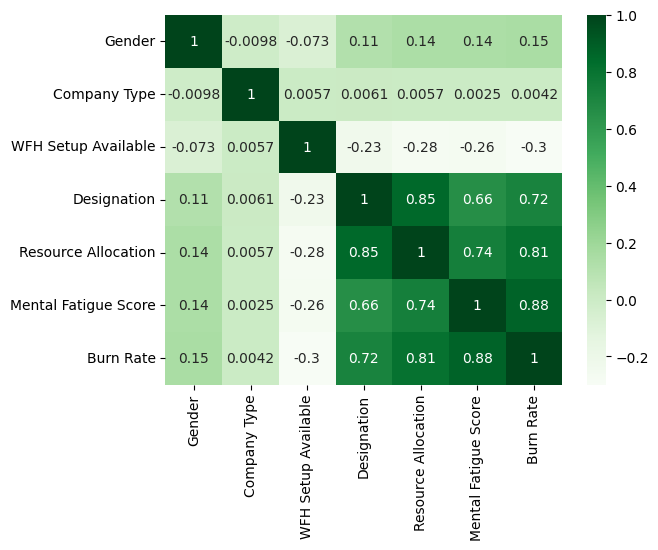

In [20]:
# Now Perform the EDA Analysis

sns.heatmap(Data.corr(),annot=True,cmap="Greens")
plt.show()

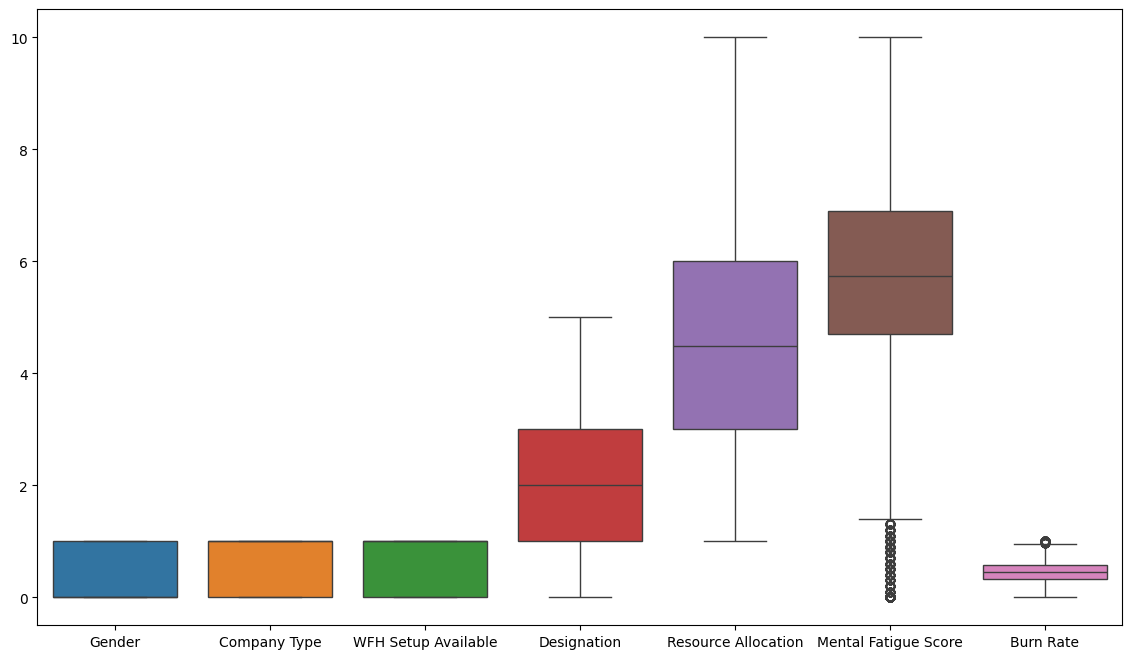

In [21]:
plt.figure(figsize=(14,8))
sns.boxplot(Data)
plt.show()

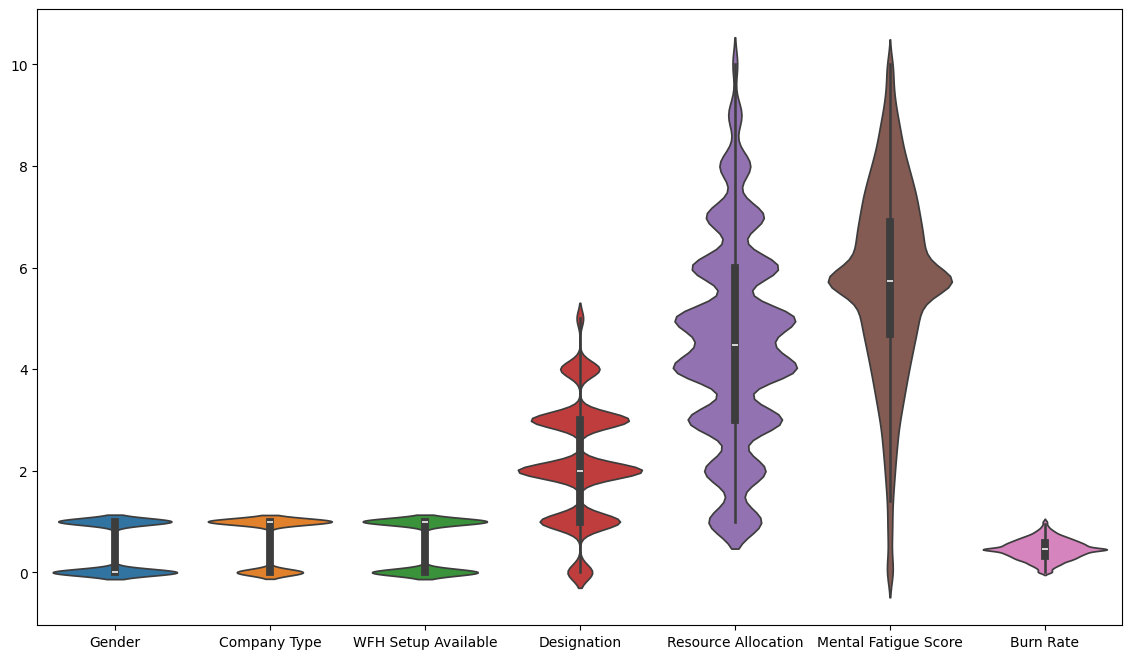

In [22]:
# Violin plot
plt.figure(figsize=(14,8))
sns.violinplot(Data)
plt.show()

In [23]:
# Perform the Scaling

Scaler = MinMaxScaler()
# I want tot perform the scaling for the only two features
Data[['Mental Fatigue Score'	,'Burn Rate']]  = Scaler.fit_transform(Data[['Mental Fatigue Score'	,'Burn Rate']])

In [24]:
Data.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,0.476571,0.652000,0.540220,2.178725,4.481398,0.572819,0.452005
std,0.499462,0.476346,0.498391,1.135145,1.984099,0.182928,0.193267
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,0.470000,0.320000
50%,0.000000,1.000000,1.000000,2.000000,4.481398,0.572819,0.452005
75%,1.000000,1.000000,1.000000,3.000000,6.000000,0.690000,0.580000
max,1.000000,1.000000,1.000000,5.000000,10.000000,1.000000,1.000000


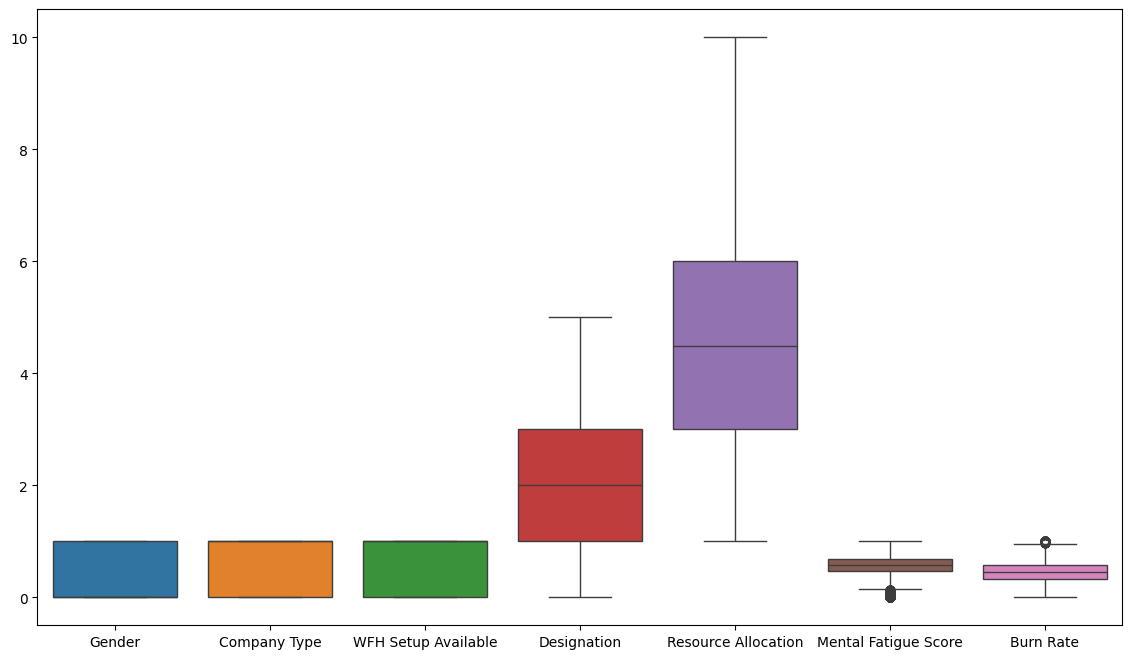

In [25]:
plt.figure(figsize=(14,8))
sns.boxplot(Data)
plt.show()

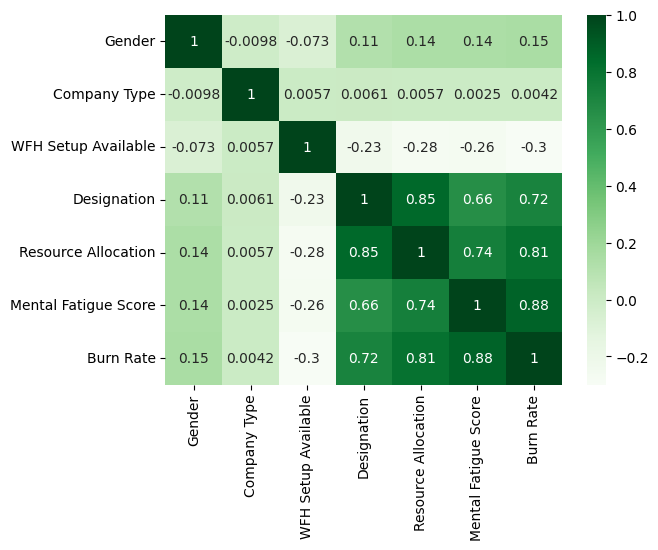

In [26]:
sns.heatmap(Data.corr(),annot=True,cmap="Greens")
plt.show()

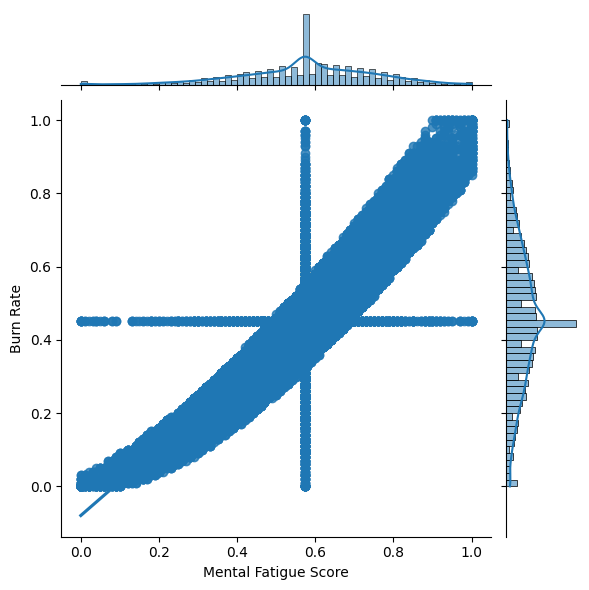

In [27]:
# Create the Join plot

sns.jointplot(x='Mental Fatigue Score',y='Burn Rate',data=Data,kind='reg')
plt.show()

In [28]:
# Split the data into Target and Features
X = Data.drop('Burn Rate',axis=1)
Y = Data['Burn Rate']

In [29]:
X.head(5)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0,1,0,2,3.000000,0.38
1,1,1,1,1,2.000000,0.50
2,0,0,1,2,4.481398,0.58
3,1,1,1,1,1.000000,0.26
4,0,1,0,3,7.000000,0.69


In [30]:
Y.head(5)

,Burn Rate
0,0.16
1,0.36
2,0.49
3,0.20
4,0.52


In [31]:
# splitting of data into the training and testing
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [32]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(15925, 6) (15925,) (6825, 6) (6825,)


**Mode 1 -- Linear Regression**

In [33]:
# Model Building
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred = lin_reg.predict(x_test)

print("The Regression Accuracy",lin_reg.score(x_test,y_test))
print("R2 Score : ",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

The Regression Accuracy 0.8334442931713195
R2 Score :  0.8334442931713195
MAE 0.05691269561653469


**Model 2 - Decision Tree Regressor**

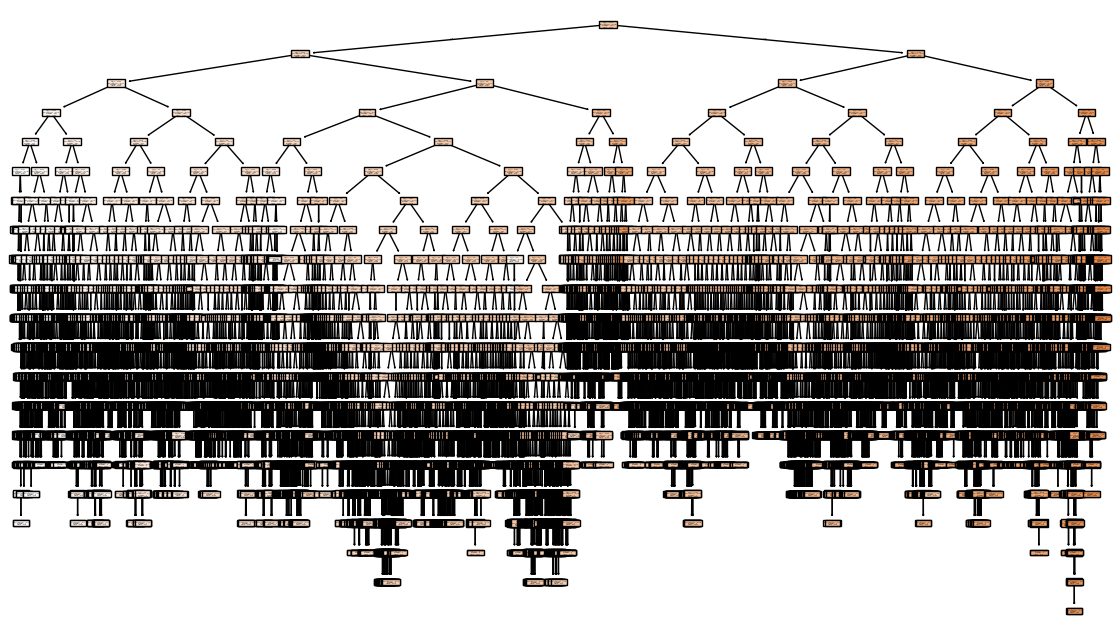

In [35]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)

from sklearn import tree
plt.figure(figsize=(14,8))
tree.plot_tree(tree_reg,filled=True)
plt.show()

In [36]:
tree_reg.predict(x_test)

print("Accuracy Score By DT",tree_reg.score(x_test,y_test))
print("R2 Score : ",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

Accuracy Score By DT 0.8084549374015357
R2 Score :  0.8334442931713195
MAE 0.05691269561653469


**Model 3 -- Random Forest Regressor**

In [37]:
random_reg = RandomForestRegressor(random_state=42)
random_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [38]:
random_reg.predict(x_test)

array([0.24820049, 0.51682984, 0.38969823, ..., 0.42904679, 0.19529788,
       0.83927667])

In [39]:
print("The Random Score By",random_reg.score(x_test,y_test))
print("R2 Score : ",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

The Random Score By 0.8396745385291682
R2 Score :  0.8334442931713195
MAE 0.05691269561653469


**As per the Model Performance RandomForest Regression Is Best Up to now which is  83.96 % Score**

In [40]:
# Now perform the Hyper Parameter Tuning
param_dist = {
    'n_estimators':[100,200,300,500],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'max_features':['auto','sqrt','log2']
}

In [44]:
# Now Perform the Search.

random_search_cv = RandomizedSearchCV(
     estimator=random_reg,
     param_distributions=param_dist,
     n_iter=25,
     scoring='r2',
     cv=7,
     verbose=2,
     random_state=42,
     n_jobs=-1
 )

# fit traning data into the search space
random_search_cv.fit(x_train,y_train)

Fitting 7 folds for each of 25 candidates, totalling 175 fits


RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2', verbose=2)

In [50]:
random_model = random_search_cv.best_estimator_

y_pred=random_model.predict(x_test)

print("The Best Estimator",random_search_cv.best_estimator_)
print("The Best Score",random_search_cv.best_params_)
print("The Accuracy Score",random_model.score(x_test,y_test))
print("R2 Score : ",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

The Best Estimator RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=300, random_state=42)
The Best Score {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
The Accuracy Score 0.8603283099987207
R2 Score :  0.8603283099987207
MAE 0.05264755421264644


**Improved Model Performance from 83.96%  ---> 86.03%**